<a href="https://colab.research.google.com/github/Aparna0112/ML-Projects/blob/main/flight_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT : AIRLINE PASSENGER SATISFACTION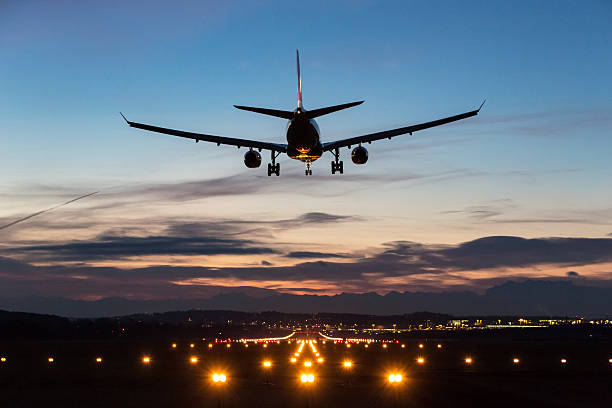**


**Goal** :
This project aims to develop a model is to  focuses on predicting or analyzing passenger satisfaction with airline services using various machine learning techniques.

**Desciption**

The dataset consists of 129880 datas.
The model achieved an accuracy of 84% on the test set using XGBClassifier.

**Import all required Libraries**

In [ ]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

**Load the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/airline_passenger_satisfaction.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
df.columns


Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

**Drop unnecessary columns**

In [ ]:
df.drop(['ID'],axis=1,inplace=True)
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
df['Class'].value_counts()

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

**Exploratary Data Analysis**

**Count Plot**

<Axes: xlabel='Satisfaction', ylabel='count'>

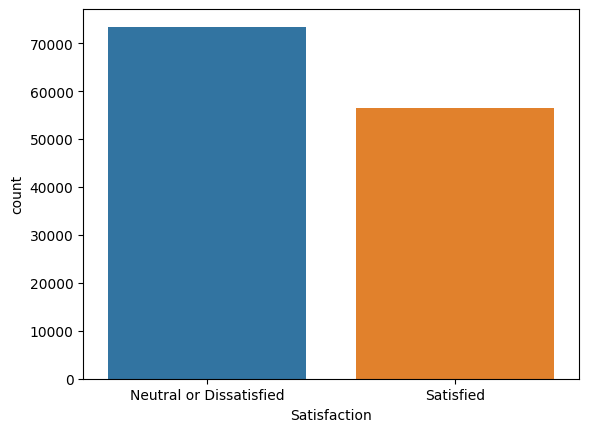

In [ ]:
sns.countplot(x='Satisfaction',data=df,hue='Satisfaction')

<Axes: xlabel='Satisfaction', ylabel='count'>

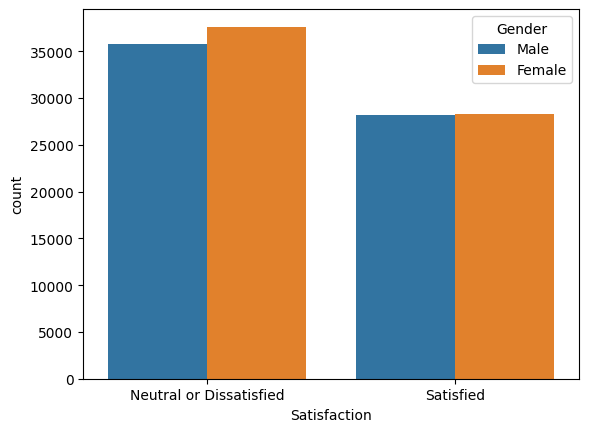

In [ ]:
sns.countplot(x='Satisfaction',data=df,hue='Gender')

<Axes: xlabel='Satisfaction', ylabel='count'>

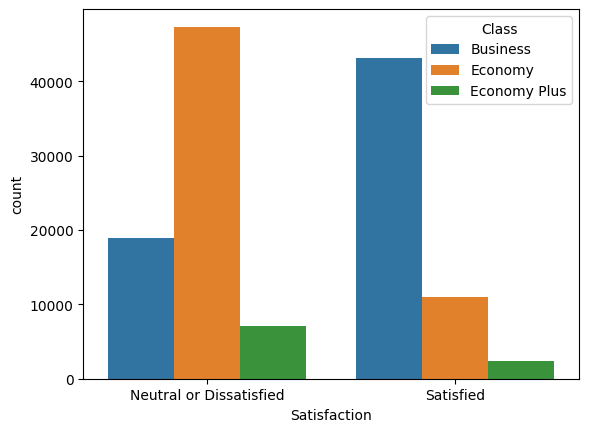

In [ ]:
sns.countplot(x='Satisfaction',data=df,hue='Class')

**PieChart**

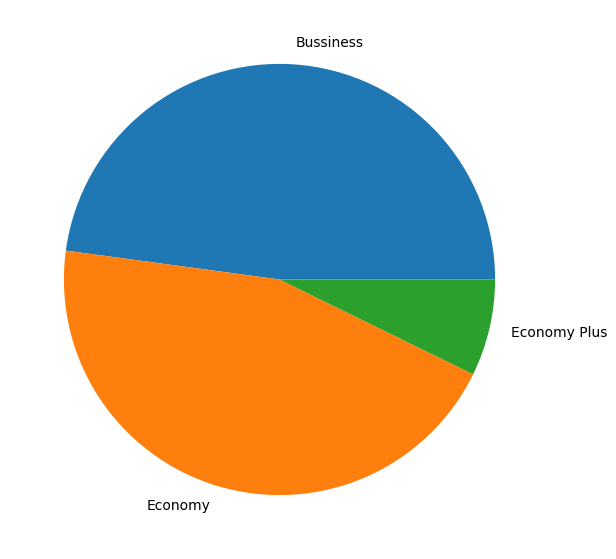

In [ ]:
status= ['Bussiness','Economy','Economy Plus']
data = [62160,58309,9411]
fig=plt.figure(figsize=(10, 7))
plt.pie(data,labels=status)
plt.show()

**JointPlot**

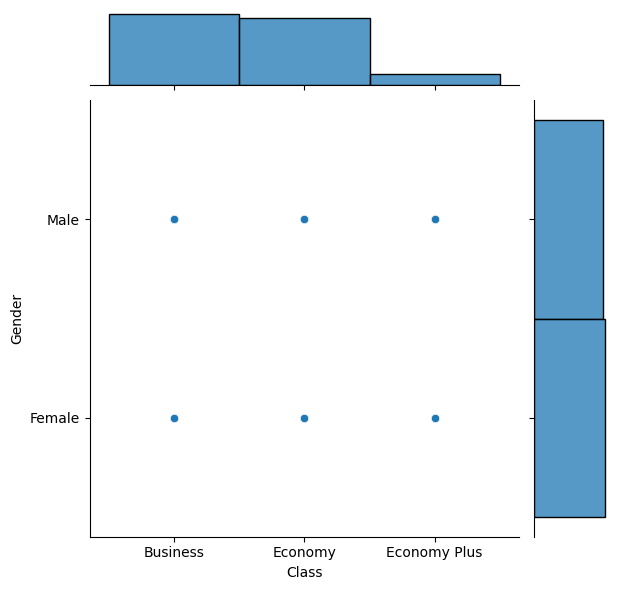

In [ ]:
sns.jointplot(x='Class',y='Gender',data=df)

**BoxPlot**

<Axes: xlabel='Gender', ylabel='Class'>

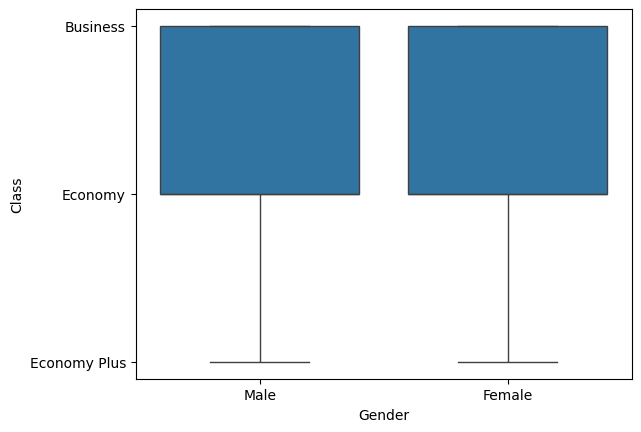

In [ ]:
sns.boxplot(x='Gender',y='Class',data=df)

<Axes: xlabel='Gender', ylabel='Class'>

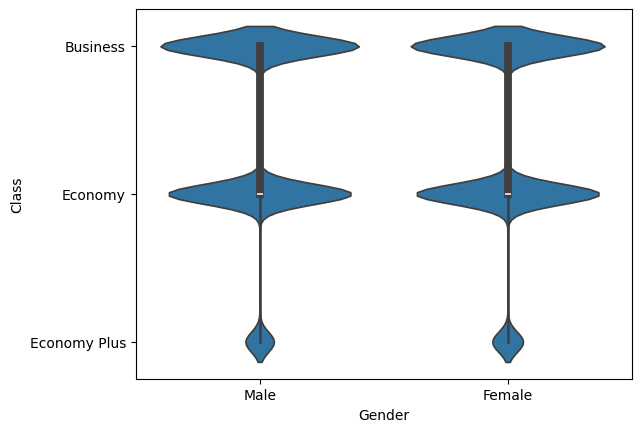

In [ ]:
sns.violinplot(x='Gender',y='Class',data=df)

**PairPlot**

**Correlation**

In [ ]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Age,1.000000,0.099459,-0.009041,-0.011248,0.036960,0.022565,0.033475,0.207572,-0.000398,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991
Flight Distance,0.099459,1.000000,0.002402,-0.001935,-0.018914,0.065165,0.073608,0.214825,0.005520,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855
Departure Delay,-0.009041,0.002402,1.000000,0.965291,0.000778,-0.005318,-0.018752,-0.019404,0.005973,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105
Arrival Delay,-0.011248,-0.001935,0.965291,1.000000,-0.000942,-0.007033,-0.021705,-0.022730,0.005658,-0.034789,-0.030521,0.011346,-0.016546,-0.031715,-0.059853,-0.017749,-0.030230,-0.007935
Departure and Arrival Time Convenience,0.036960,-0.018914,0.000778,-0.000942,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833
Ease of Online Booking,0.022565,0.065165,-0.005318,-0.007033,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148
Check-in Service,0.033475,0.073608,-0.018752,-0.021705,0.091132,0.008819,1.000000,0.204238,-0.039353,0.244619,0.189979,0.152693,0.176658,0.085198,0.237601,0.043762,0.119554,0.234503
Online Boarding,0.207572,0.214825,-0.019404,-0.022730,0.072287,0.404866,0.204238,1.000000,0.002756,0.154242,0.419253,0.123225,0.329377,0.233500,0.074058,0.457445,0.283922,0.083541
Gate Location,-0.000398,0.005520,0.005973,0.005658,0.447510,0.460041,-0.039353,0.002756,1.000000,-0.029019,0.002788,-0.005181,-0.005918,-0.002872,0.000310,0.338573,0.002741,0.000972
On-board Service,0.057078,0.111194,-0.030486,-0.034789,0.067297,0.039064,0.244619,0.154242,-0.029019,1.000000,0.130545,0.357721,0.122084,0.057404,0.551569,0.119928,0.418574,0.520296


**Check missing value**

In [ ]:
df.isna().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

**Fill the missing value using mode()**

In [ ]:
df['Arrival Delay']=df['Arrival Delay'].fillna(df['Arrival Delay'].mode()[0])

In [ ]:
df.isna().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

**Check the type**

In [ ]:
df.dtypes

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


**Perform Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=['Gender','Customer Type','Type of Travel','Flight Distance','Class','Satisfaction']
for i in l:
  df[i]=le.fit_transform(df[i])
df


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,693,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,693,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,725,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1720,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3285,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,346,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,0
129876,1,41,1,1,2,214,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,0
129877,1,42,1,1,2,241,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,0
129878,1,50,1,1,2,241,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,1


In [ ]:
df.dtypes

Gender                                      int64
Age                                         int64
Customer Type                               int64
Type of Travel                              int64
Class                                       int64
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


**Separate the data into input and output**

In [ ]:
X=df.iloc[:,:-1]
X

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,48,0,0,0,693,2,5.0,3,3,...,3,3,5,2,5,5,5,3,5,5
1,0,35,1,0,0,693,26,39.0,2,2,...,2,5,4,5,5,3,5,2,5,5
2,1,41,1,0,0,725,0,0.0,4,4,...,4,3,5,3,5,5,3,4,3,3
3,1,50,1,0,0,1720,0,0.0,2,2,...,2,5,5,5,4,4,5,2,5,5
4,0,49,1,0,0,3285,0,1.0,3,3,...,3,3,4,4,5,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,346,2,3.0,4,4,...,2,5,1,4,4,4,5,4,4,4
129876,1,41,1,1,2,214,0,0.0,5,3,...,4,5,2,5,2,2,4,3,2,5
129877,1,42,1,1,2,241,6,14.0,5,2,...,1,3,3,4,3,3,4,2,3,5
129878,1,50,1,1,2,241,31,22.0,4,4,...,1,4,4,5,3,3,4,5,3,5


In [ ]:
y=df.iloc[:,-1]
y

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129880, dtype: int64

**Finding Correlation**

In [ ]:
df.corr()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
Gender,1.000000,0.008996,0.030958,0.009503,-0.011574,0.003605,0.003491,0.001286,0.008995,0.005893,...,0.006447,-0.030756,0.031047,0.002867,0.001730,0.038504,0.005901,0.003843,0.036356,0.011236
Age,0.008996,1.000000,0.284172,-0.044808,-0.116921,0.100024,-0.009041,-0.011206,0.036960,0.022565,...,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991,0.134091
Customer Type,0.030958,0.284172,1.000000,0.308236,-0.042994,0.225784,-0.003859,-0.004769,0.206873,0.018059,...,0.054172,0.156239,0.046841,0.081302,0.056997,-0.023292,0.005757,0.106001,-0.024874,0.186017
Type of Travel,0.009503,-0.044808,0.308236,1.000000,0.486718,-0.267367,-0.005913,-0.005972,0.257102,-0.134078,...,-0.059794,-0.127717,-0.139612,-0.084615,-0.068986,-0.023538,-0.105865,-0.152936,-0.033012,-0.449861
Class,-0.011574,-0.116921,-0.042994,0.486718,1.000000,-0.426821,0.009530,0.014037,0.087152,-0.095138,...,-0.210649,-0.212334,-0.198825,-0.129623,-0.080773,-0.159285,-0.024962,-0.183162,-0.166588,-0.448193
Flight Distance,0.003605,0.100024,0.225784,-0.267367,-0.426821,1.000000,0.002387,-0.001916,-0.019355,0.064917,...,0.111192,0.157681,0.134409,0.095641,0.057156,0.059153,0.006653,0.130792,0.064712,0.298198
Departure Delay,0.003491,-0.009041,-0.003859,-0.005913,0.009530,0.002387,1.000000,0.959382,0.000778,-0.005318,...,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105,-0.050740
Arrival Delay,0.001286,-0.011206,-0.004769,-0.005972,0.014037,-0.001916,0.959382,1.000000,-0.001005,-0.007046,...,-0.034671,-0.030397,0.011384,-0.016547,-0.031685,-0.059685,-0.017762,-0.030183,-0.007997,-0.058145
Departure and Arrival Time Convenience,0.008995,0.036960,0.206873,0.257102,0.087152,-0.019355,0.000778,-0.001005,1.000000,0.437620,...,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833,-0.054270
Ease of Online Booking,0.005893,0.022565,0.018059,-0.134078,-0.095138,0.064917,-0.005318,-0.007046,0.437620,1.000000,...,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148,0.168877


**Perform Feature Selection**

In [ ]:
X_new=X.drop(['Ease of Online Booking','Leg Room Service','Online Boarding','Gate Location','Flight Distance','In-flight Wifi Service','In-flight Entertainment','Age','Departure and Arrival Time Convenience','Type of Travel','Customer Type'],axis=1,inplace=True)
X

,Gender,Class,Departure Delay,Arrival Delay,Check-in Service,On-board Service,Seat Comfort,Cleanliness,Food and Drink,In-flight Service,Baggage Handling
0,1,0,2,5.0,4,3,5,5,5,5,5
1,0,0,26,39.0,3,5,4,5,3,5,5
2,1,0,0,0.0,4,3,5,5,5,3,3
3,1,0,0,0.0,3,5,5,4,4,5,5
4,0,0,0,1.0,3,3,4,5,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...
129875,1,2,2,3.0,4,5,1,4,4,5,4
129876,1,2,0,0.0,5,5,2,2,2,4,5
129877,1,2,6,14.0,4,3,3,3,3,4,5
129878,1,2,31,22.0,3,4,4,3,3,4,5


**Perform scaling using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 0.        , 0.00125628, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.01633166, ..., 0.6       , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.6       ,
        0.5       ],
       ...,
       [1.        , 1.        , 0.00376884, ..., 0.6       , 0.8       ,
        1.        ],
       [1.        , 1.        , 0.01947236, ..., 0.6       , 0.8       ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.4       , 0.4       ,
        0.        ]])

**Split the dataset into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,y_train.shape

((90916, 11), (90916,))

In [ ]:
X_test.shape,y_test.shape

((38964, 11), (38964,))

Model Creation

*  KNeighbor Classifier
*  GaussianNB Classifier
*  RandomForest Classifier
*  DecisionTree Classifier
*  AdaBoost Classifier
*  XGB Classifier



Accuracy= 80.54871163124936
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     22072
           1       0.79      0.74      0.77     16892

    accuracy                           0.81     38964
   macro avg       0.80      0.80      0.80     38964
weighted avg       0.80      0.81      0.80     38964



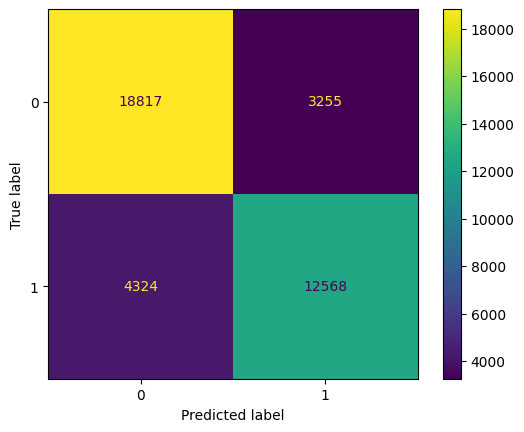

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print("Accuracy=",accuracy_score(y_test,y_pred_knn)*100)
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

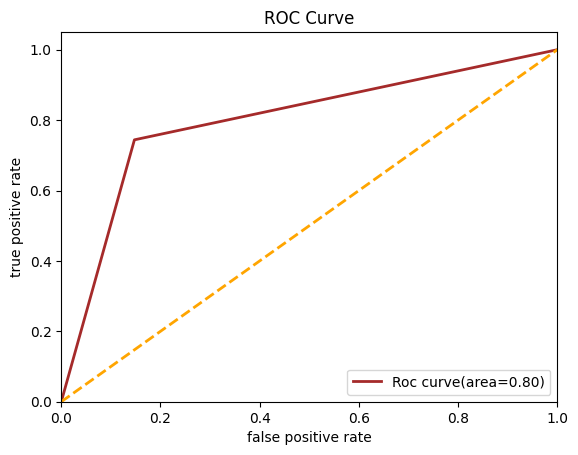

In [ ]:
fpr_knn,tpr_knn,treshold=roc_curve(y_test,y_pred_knn)
auc_knn=auc(fpr_knn,tpr_knn)
plt.figure()
lw=2
plt.plot(fpr_knn,tpr_knn,color='brown',lw=lw,label='Roc curve(area=%0.2f)'%auc_knn)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()


Accuracy= 73.24196694384561
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     22072
           1       0.68      0.73      0.70     16892

    accuracy                           0.73     38964
   macro avg       0.73      0.73      0.73     38964
weighted avg       0.74      0.73      0.73     38964



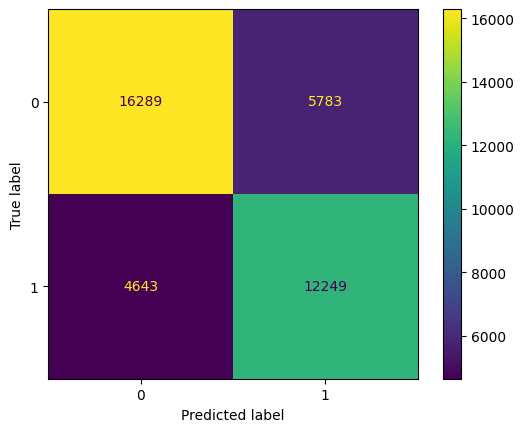

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print("Accuracy=",accuracy_score(y_test,y_pred_nb)*100)
print(classification_report(y_test,y_pred_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))
#print("ROC-AUC Score",roc_auc_score(y_test,y_pred_nb)*100)

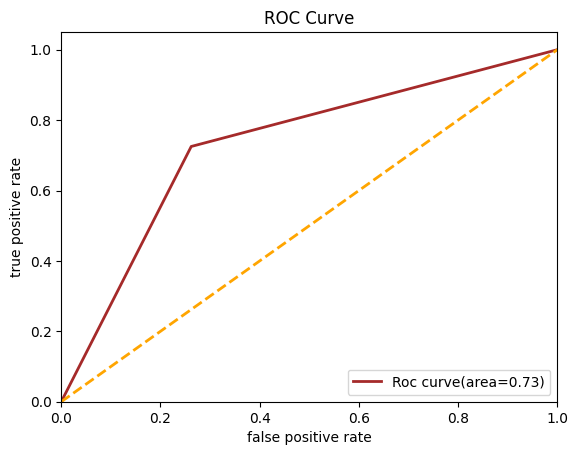

In [ ]:
fpr_nb,tpr_nb,treshold=roc_curve(y_test,y_pred_nb)
auc_nb=auc(fpr_nb,tpr_nb)
plt.figure()
lw=2
plt.plot(fpr_nb,tpr_nb,color='brown',lw=lw,label='Roc curve(area=%0.2f)'%auc_nb)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 81.86274509803921
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     22072
           1       0.86      0.70      0.77     16892

    accuracy                           0.82     38964
   macro avg       0.83      0.80      0.81     38964
weighted avg       0.82      0.82      0.82     38964



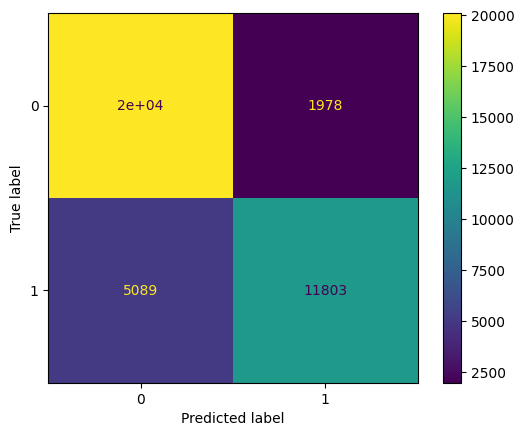

In [ ]:
rf=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print("Accuracy=",accuracy_score(y_test,y_pred_rf)*100)
print(classification_report(y_test,y_pred_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))
#print("ROC-AUC Score",roc_auc_score(y_test,y_pred_rf)*100)

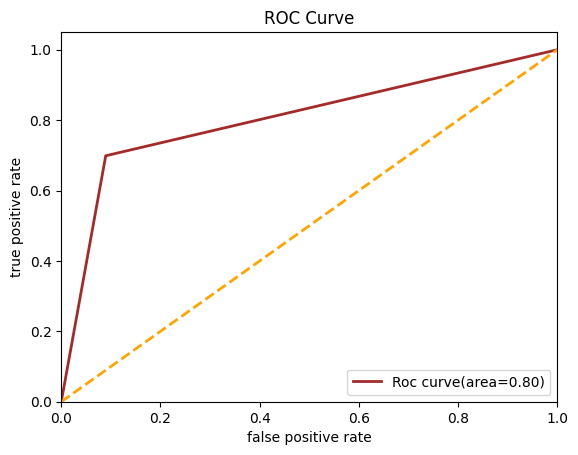

In [ ]:
fpr_rf,tpr_rf,treshold=roc_curve(y_test,y_pred_rf)
auc_rf=auc(fpr_rf,tpr_rf)
plt.figure()
lw=2
plt.plot(fpr_rf,tpr_rf,color='brown',lw=lw,label='Roc curve(area=%0.2f)'%auc_rf)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 78.31588132635254
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     22072
           1       0.76      0.73      0.75     16892

    accuracy                           0.78     38964
   macro avg       0.78      0.78      0.78     38964
weighted avg       0.78      0.78      0.78     38964



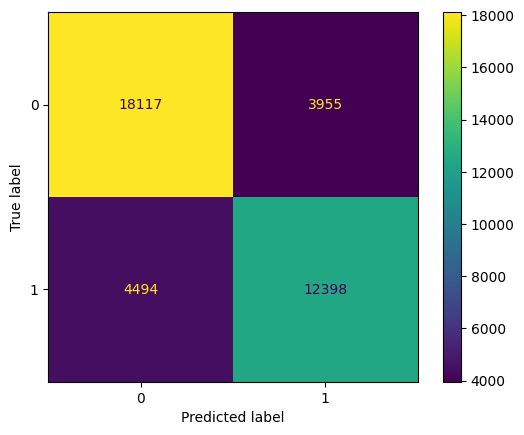

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print("Accuracy=",accuracy_score(y_test,y_pred_dt)*100)
print(classification_report(y_test,y_pred_dt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt))
#print("ROC-AUC Score",roc_auc_score(y_test,y_pred_dt*100))

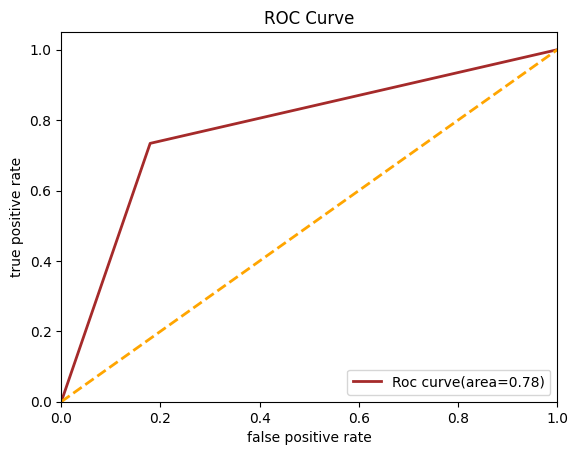

In [ ]:
fpr_dt,tpr_dt,treshold=roc_curve(y_test,y_pred_dt)
auc_dt=auc(fpr_dt,tpr_dt)
plt.figure()
lw=2
plt.plot(fpr_dt,tpr_dt,color='brown',lw=lw,label='Roc curve(area=%0.2f)'%auc_dt)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 79.81213427779488
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     22072
           1       0.78      0.75      0.76     16892

    accuracy                           0.80     38964
   macro avg       0.80      0.79      0.79     38964
weighted avg       0.80      0.80      0.80     38964

ROC-AUC Score 79.20717213172793


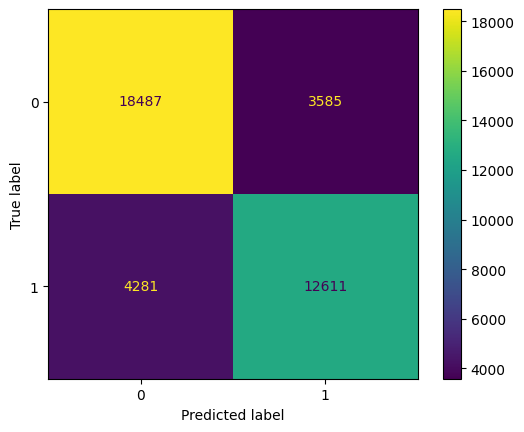

In [ ]:
ad=AdaBoostClassifier(n_estimators=200,random_state=1)
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
print("Accuracy=",accuracy_score(y_test,y_pred_ad)*100)
print(classification_report(y_test,y_pred_ad))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad))
print("ROC-AUC Score",roc_auc_score(y_test,y_pred_ad)*100)

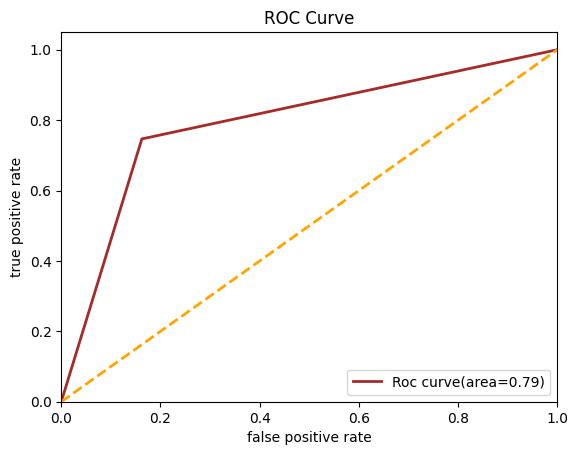

In [ ]:
fpr_ad,tpr_ad,treshold=roc_curve(y_test,y_pred_ad)
auc_ad=auc(fpr_ad,tpr_ad)
plt.figure()
lw=2
plt.plot(fpr_ad,tpr_ad,color='brown',lw=lw,label='Roc curve(area=%0.2f)'%auc_ad)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 83.70547171748281
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     22072
           1       0.84      0.77      0.80     16892

    accuracy                           0.84     38964
   macro avg       0.84      0.83      0.83     38964
weighted avg       0.84      0.84      0.84     38964

ROC-AUC Score 82.89512238894052


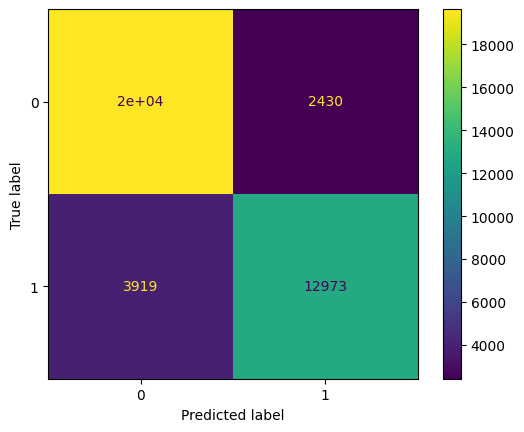

In [ ]:
xg=XGBClassifier(n_estimators=200,random_state=1)
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
print("Accuracy=",accuracy_score(y_test,y_pred_xg)*100)
print(classification_report(y_test,y_pred_xg))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xg))
print("ROC-AUC Score",roc_auc_score(y_test,y_pred_xg)*100)

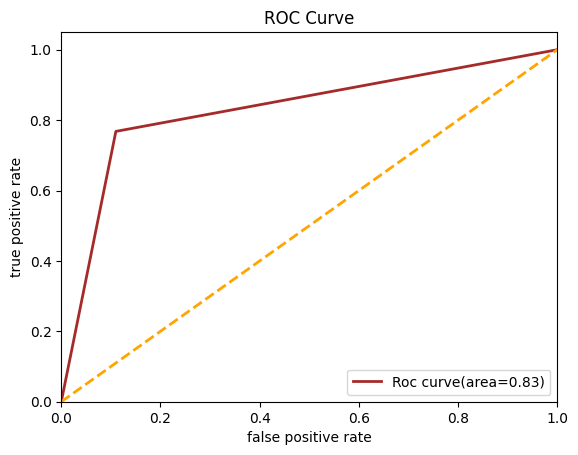

In [ ]:
fpr_xg,tpr_xg,treshold=roc_curve(y_test,y_pred_xg)
auc_xg=auc(fpr_xg,tpr_xg)
plt.figure()
lw=2
plt.plot(fpr_xg,tpr_xg,color='brown',lw=lw,label='Roc curve(area=%0.2f)'%auc_xg)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Hyper Parameter Tuning**

In [ ]:
params_xg={'n_estimators':[50,100,150,200],
            'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_xg=GridSearchCV(xg,params_xg,cv=10,scoring='accuracy')
clf_xg.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 150, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
print(clf_xg.best_params_)

{'n_estimators': 100, 'random_state': 1}


Accuracy= 83.80813058207576
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     22072
           1       0.85      0.77      0.80     16892

    accuracy                           0.84     38964
   macro avg       0.84      0.83      0.83     38964
weighted avg       0.84      0.84      0.84     38964



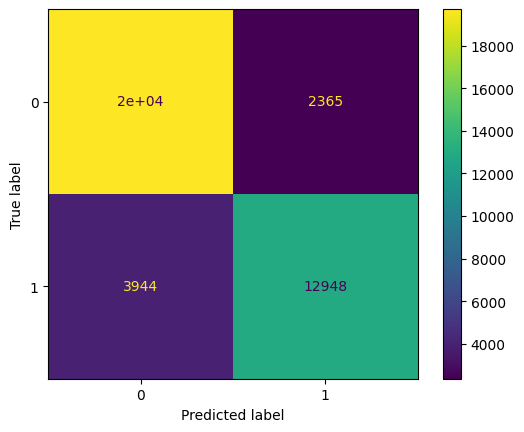

In [ ]:
xg1=XGBClassifier(n_estimators=100,random_state=1)
xg1.fit(X_train,y_train)
y_pred_xg1=xg1.predict(X_test)
print("Accuracy=",accuracy_score(y_test,y_pred_xg1)*100)
print(classification_report(y_test,y_pred_xg1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xg1))
#print("ROC-AUC Score",roc_auc_score(y_test,y_pred_xg1)*100)

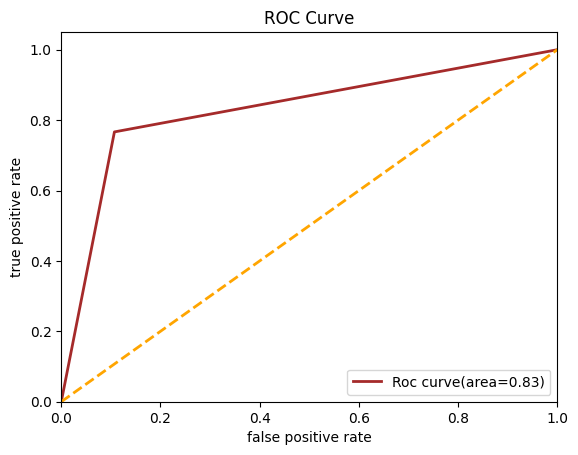

In [ ]:
fpr_xg1,tpr_xg1,treshold=roc_curve(y_test,y_pred_xg1)
auc_xg1=auc(fpr_xg1,tpr_xg1)
plt.figure()
lw=2
plt.plot(fpr_xg1,tpr_xg1,color='brown',lw=lw,label='Roc curve(area=%0.2f)'%auc_xg1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Perform Overfitting**

In [ ]:
y.value_counts()

0    73452
1    56428
Name: Satisfaction, dtype: int64

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
y_os.value_counts()

0    73452
1    73452
Name: Satisfaction, dtype: int64

In [ ]:
mms=MinMaxScaler()
X_os=mms.fit_transform(X_os,y_os)
X_os


array([[1.        , 0.        , 0.00125628, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.01633166, ..., 0.6       , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.6       ,
        0.5       ],
       ...,
       [0.        , 0.        , 0.01067839, ..., 0.4       , 0.4       ,
        0.25      ],
       [1.        , 0.        , 0.00502513, ..., 0.8       , 1.        ,
        1.        ],
       [0.        , 0.        , 0.00251256, ..., 0.8       , 1.        ,
        1.        ]])

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)


Accuracy= 83.8922671991287
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     22016
           1       0.86      0.81      0.83     22056

    accuracy                           0.84     44072
   macro avg       0.84      0.84      0.84     44072
weighted avg       0.84      0.84      0.84     44072

ROC-AUC Score 83.89471076134954


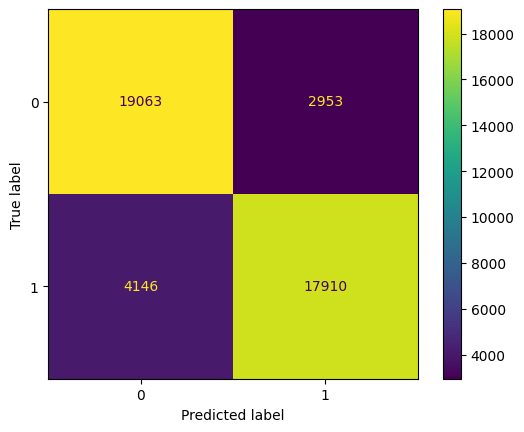

In [ ]:
xg1_os=XGBClassifier(n_estimators=200,random_state=1)
xg1_os.fit(X_train_os,y_train_os)
y_pred_xg1_os=xg1_os.predict(X_test_os)
print("Accuracy=",accuracy_score(y_test_os,y_pred_xg1_os)*100)
print(classification_report(y_test_os,y_pred_xg1_os))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_xg1_os))
print("ROC-AUC Score",roc_auc_score(y_test_os,y_pred_xg1_os)*100)

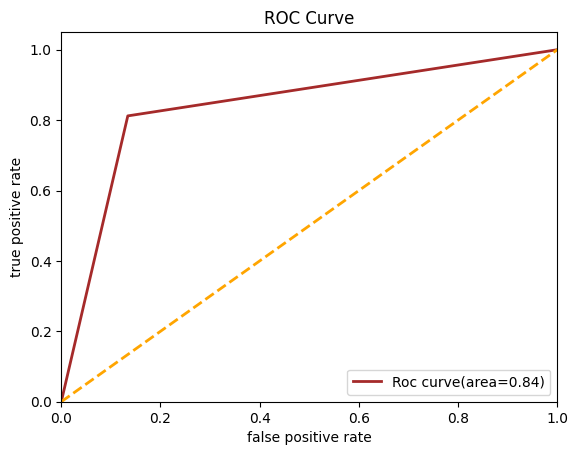

In [ ]:
fpr_xg1_os,tpr_xg1_os,treshold=roc_curve(y_test_os,y_pred_xg1_os)
auc_xg1_os=auc(fpr_xg1_os,tpr_xg1_os)
plt.figure()
lw=2
plt.plot(fpr_xg1_os,tpr_xg1_os,color='brown',lw=lw,label='Roc curve(area=%0.2f)'%auc_xg1_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
dic={'Model':['KNeighbors','GaussianNB','RandomForest','AdaBoost','DecisionTree','XGBoost'],
     'Accuracy':[81,73,82,78,80,84]}
df=pd.DataFrame(dic)
df

,Model,Accuracy
0,KNeighbors,81
1,GaussianNB,73
2,RandomForest,82
3,AdaBoost,78
4,DecisionTree,80
5,XGBoost,84


**Import pickle**

In [ ]:
import pickle
pickle.dump(xg1_os,open('flight1_model.sav','wb'))
pickle.dump(mms,open('fly_scaler.sav','wb'))